In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"


In [6]:
import tensorflow as tf
from matplotlib import pyplot as plt

from utils import init_mnist, make_mnist_iter, compute_mmd


# data
batch_size = 128
train_steps = 500
noise = 100


def gen(shape_dummy):
    """Sampler from random noise."""
    with tf.variable_scope("generator"):
        noise = tf.random_uniform(shape_dummy, minval=-1, maxval=1)
        layers = [256, 512, 1024]
        out = noise
        for n_h in layers:
            out = tf.layers.dense(out, n_h, activation=tf.nn.relu)
        out = tf.layers.dense(out, 784, activation=tf.nn.sigmoid)
        return out


In [10]:
tf.reset_default_graph()

iterator, img_pl, lbl_pl = make_mnist_iter(batch_size, train=True)
next_batch = iterator.get_next()

generated = gen(tf.shape(next_batch[0]))  # ugh

loss = tf.sqrt(compute_mmd(next_batch[0], generated, [0.1]))

opt = tf.train.AdamOptimizer()
grads_vars = opt.compute_gradients(loss)
take_step = opt.apply_gradients(grads_vars)


Step 0
Loss 1.0447557


Step 50
Loss 0.4799245


Step 100
Loss 0.31720346


Step 150
Loss 0.26152086


Step 200
Loss 0.22600447


Step 250
Loss 0.21803907


Step 300
Loss 0.20283273


Step 350
Loss 0.17285506


Step 400
Loss 0.16853334


Step 450
Loss 0.18016638


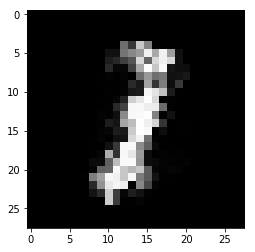

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    init_mnist(sess, iterator, img_pl, lbl_pl)
    for step in range(train_steps):
        _,  mmd = sess.run([take_step, loss])

        if not step % 50:
            print("Step", step)
            print("Loss", mmd)

    while True:
        imgs = sess.run(generated)
        for thing in imgs:
            plt.imshow(thing.reshape((28, 28)), cmap="Greys_r", vmin=0, vmax=1)
            plt.show()
            input()
